# ライブラリ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 迷路

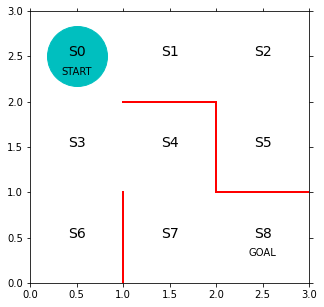

In [2]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='r', linewidth=2)
plt.plot([1, 2], [2, 2], color='r', linewidth=2)
plt.plot([2, 2], [2, 1], color='r', linewidth=2)
plt.plot([2, 3], [1, 1], color='r', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')
				
line, = ax.plot([0.5], [2.5], marker="o", color='c', markersize=60)

In [14]:
theta_0 = np.array([
                    [np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7
                    ])
theta_0

array([[nan,  1.,  1., nan],
       [nan,  1., nan,  1.],
       [nan, nan,  1.,  1.],
       [ 1.,  1.,  1., nan],
       [nan, nan,  1.,  1.],
       [ 1., nan, nan, nan],
       [ 1., nan, nan, nan],
       [ 1.,  1., nan, nan]])

In [15]:
def ratio_convert_pi(theta):

    [m, n] = theta.shape
    
    pi = np.zeros((m, n))

    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

In [16]:
def softmax_convert_pi(theta):

    beta = 1.0

    [m, n] = theta.shape
    
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)

    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

In [17]:
pi_0 = softmax_convert_pi(theta_0)
pi_0

array([[0.   , 0.5  , 0.5  , 0.   ],
       [0.   , 0.5  , 0.   , 0.5  ],
       [0.   , 0.   , 0.5  , 0.5  ],
       [0.333, 0.333, 0.333, 0.   ],
       [0.   , 0.   , 0.5  , 0.5  ],
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [0.5  , 0.5  , 0.   , 0.   ]])

In [18]:
def get_next_s(s, pi):

    direction = ['up', 'right', 'down', 'left']

    next_direction = np.random.choice(direction, p=pi[s, :])

    next = s
    action = -1

    if next_direction == 'up':
        action = 0
        next = s - 3
    elif next_direction == 'right':
        action = 1
        next = s + 1
    elif next_direction == 'down':
        action = 2
        next = s + 3
    elif next_direction == 'left':
        action = 3
        next = s - 1

    return [next, action]

In [19]:
def move(pi):
    s = 0

    state_list = [[0, np.nan]]


    while (1):

        [next, action] = get_next_s(s, pi)

        state_list[-1][1] = action

        state_list.append([next, np.nan])

        if next == 8:
            break
        else:
            s = next

    return state_list

In [20]:
state_list = move(pi_0)
print(state_list)
print(len(state_list)-1)

[[0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 0], [0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 2], [6, 0], [3, 1], [4, 3], [3, 1], [4, 3], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]
42


In [21]:
def update_theta(theta, pi, state_list):
    eta = 0.1

    T = len(state_list) - 1

    [m, n] = theta.shape

    delta_theta = theta.copy()

    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i,j])):
                
                sa_i = [sa for sa in state_list if sa[0] == i]

                sa_ij = [sa for sa in state_list if sa == [i, j]]

                N_i = len(sa_i)

                N_ij = len(sa_ij)

                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    return theta + eta * delta_theta

In [22]:
n_theta = update_theta(theta_0, pi_0, state_list)
n_theta

pi = softmax_convert_pi(n_theta)
pi

array([[0.   , 0.501, 0.499, 0.   ],
       [0.   , 0.501, 0.   , 0.499],
       [0.   , 0.   , 0.499, 0.501],
       [0.332, 0.334, 0.334, 0.   ],
       [0.   , 0.   , 0.499, 0.501],
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [0.5  , 0.5  , 0.   , 0.   ]])

In [23]:
stop = 10**-4

theta = theta_0
pi = pi_0

is_continue = True
while is_continue:
    state_list = move(pi)
    n_theta = update_theta(theta, pi, state_list)
    n_pi = softmax_convert_pi(n_theta)

    d_pi = np.sum(np.abs(n_pi - pi))
    print('piの変化量', d_pi)
    print('ステップ数', len(state_list)-1)

    if d_pi < stop:
        is_continue = False
    else:
        theta = n_theta
        pi = n_pi

piの変化量 0.0069110993844752056
ステップ数 172
piの変化量 0.021571983679821827
ステップ数 16
piの変化量 0.01186687429431621
ステップ数 44
piの変化量 0.011254097059613
ステップ数 98
piの変化量 0.00726228109983762
ステップ数 42
piの変化量 0.012577414658774544
ステップ数 16
piの変化量 0.029594374064799034
ステップ数 12
piの変化量 0.03976606699085744
ステップ数 10
piの変化量 0.013139571337575262
ステップ数 78
piの変化量 0.010914075943070034
ステップ数 70
piの変化量 0.013123213195413208
ステップ数 40
piの変化量 0.02968631684576606
ステップ数 12
piの変化量 0.011307407998698504
ステップ数 38
piの変化量 0.00918384475052575
ステップ数 84
piの変化量 0.010335802868550459
ステップ数 86
piの変化量 0.015620915030255922
ステップ数 38
piの変化量 0.005623249147351017
ステップ数 74
piの変化量 0.014986118949361804
ステップ数 38
piの変化量 0.03256662521715836
ステップ数 6
piの変化量 0.011991227517613223
ステップ数 68
piの変化量 0.04815752090930181
ステップ数 4
piの変化量 0.006374859250715681
ステップ数 34
piの変化量 0.028193365750113553
ステップ数 10
piの変化量 0.04739587125390354
ステップ数 4
piの変化量 0.030737522491579017
ステップ数 6
piの変化量 0.005443857267620589
ステップ数 42
piの変化量 0.021811866062079355
ステップ数 42
piの変化量 0.01352

In [24]:
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.015 0.985 0.   ]
 [0.    0.253 0.    0.747]
 [0.    0.    0.443 0.557]
 [0.011 0.976 0.012 0.   ]
 [0.    0.    0.985 0.015]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.012 0.988 0.    0.   ]]
